# Part 7 - Plot Claims
- toc: True
- badges: true
- comments: true
- categories: [jupyter]

Plot the regular state Initial and Continued claims data alongside the Pandemic claims data

Not required

In [32]:
import os
import sys
import inspect
import datetime
import re
import pandas as pd
import numpy as np
from plotnine import ggplot
import matplotlib.pyplot as plt

In [33]:
data_dir = "./data"
fnames = os.listdir(data_dir)
dfs = {}
for fname in fnames:
    fpath = os.path.join(data_dir, fname)
    head, tail = os.path.split(fpath)
    fbase,ext = os.path.splitext(tail)
    if os.path.isfile(fpath) and ext == ".csv":
        df = pd.read_csv(fpath)
        print("{0}  shape:{1}".format(fbase,df.shape))
        dfs[fbase] = df

google_trends  shape:(104, 24)
tidy_fred  shape:(897, 18)
umich_exp  shape:(159, 5)
us_pau_claims  shape:(57, 4)


In [34]:
fred_df = dfs["tidy_fred"]
claims_cols = [c for c in fred_df.columns if re.search("date|CCSA|ICSA", c)]
fred_claims = fred_df[claims_cols]
fred_claims["date"] = pd.to_datetime(fred_claims["date"])
display(fred_claims.tail(2))
#[["date", "ICSA", "CCSA"]]
#fred_claims["date"] = pd.to_datetime(fred_claims["date"])

<ipython-input-34-682dbbecfec4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,ICSA: Initial Claims,CCSA: Continued Claims
895,2021-04-24,553000.0,3690000.0
896,2021-05-01,498000.0,NaN


In [35]:

pau_claims = dfs['us_pau_claims']
display(pau_claims.tail(2))
pau_claims["date"] = pd.to_datetime(pau_claims["date"])

display(fred_claims.tail(5))
display(pau_claims.tail(5))

claims_df = fred_claims.merge(pau_claims, how="outer", on="date")
claims_df.set_index(keys="date", inplace=True)
display(claims_df.tail(5))


,date,PUA IC,PUA CC,PEUC CC
55,2021-04-24,121749,6862705.0,4972507.0
56,2021-05-01,133342,NaN,NaN


,date,ICSA: Initial Claims,CCSA: Continued Claims
892,2021-04-03,744000.0,3731000.0
893,2021-04-10,576000.0,3674000.0
894,2021-04-17,547000.0,3660000.0
895,2021-04-24,553000.0,3690000.0
896,2021-05-01,498000.0,NaN


,date,PUA IC,PUA CC,PEUC CC
52,2021-04-03,152328,7149826.0,5158231.0
53,2021-04-10,129697,7309604.0,5605935.0
54,2021-04-17,133342,6974909.0,5194099.0
55,2021-04-24,121749,6862705.0,4972507.0
56,2021-05-01,133342,NaN,NaN


,ICSA: Initial Claims,CCSA: Continued Claims,PUA IC,PUA CC,PEUC CC
date,,,,,
2021-04-03,744000.0,3731000.0,152328.0,7149826.0,5158231.0
2021-04-10,576000.0,3674000.0,129697.0,7309604.0,5605935.0
2021-04-17,547000.0,3660000.0,133342.0,6974909.0,5194099.0
2021-04-24,553000.0,3690000.0,121749.0,6862705.0,4972507.0
2021-05-01,498000.0,NaN,133342.0,NaN,NaN


In [41]:
claims_df.sort_index( inplace=True)
print(claims_df.columns)
display(claims_df.tail(2))
ic_df = claims_df[[claims_cols[1], 'PUA IC']].dropna(how="all")
ic_df["IC_all"] = ic_df.sum(axis=1, skipna=False)
cc_df = claims_df[[claims_cols[2], 'PUA CC', 'PEUC CC']].dropna(how="all")
cc_df["CC_all"] = cc_df.sum(axis=1, skipna=False)

ic_df.reset_index(inplace=True)
cc_df.reset_index(inplace=True)
display(cc_df.tail(4))
display(ic_df.tail(4))

Index(['ICSA: Initial Claims', 'CCSA: Continued Claims ', 'PUA IC', 'PUA CC',
       'PEUC CC'],
      dtype='object')


,ICSA: Initial Claims,CCSA: Continued Claims,PUA IC,PUA CC,PEUC CC
date,,,,,
2021-04-24,553000.0,3690000.0,121749.0,6862705.0,4972507.0
2021-05-01,498000.0,NaN,133342.0,NaN,NaN


,date,CCSA: Continued Claims,PUA CC,PEUC CC,CC_all
743,2021-04-03,3731000.0,7149826.0,5158231.0,16039057.0
744,2021-04-10,3674000.0,7309604.0,5605935.0,16589539.0
745,2021-04-17,3660000.0,6974909.0,5194099.0,15829008.0
746,2021-04-24,3690000.0,6862705.0,4972507.0,15525212.0


,date,ICSA: Initial Claims,PUA IC,IC_all
744,2021-04-10,576000.0,129697.0,705697.0
745,2021-04-17,547000.0,133342.0,680342.0
746,2021-04-24,553000.0,121749.0,674749.0
747,2021-05-01,498000.0,133342.0,631342.0


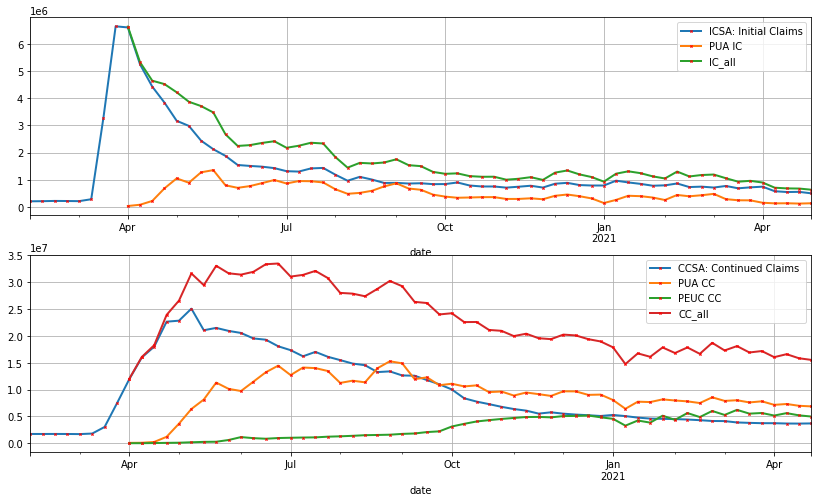

In [52]:
import matplotlib.dates as mdates
figwd = 14
fight= 8
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[figwd, fight], sharex='row')
first_date = '2020-02-01'
temp_ic = ic_df.loc[ic_df["date"] > first_date]
temp_ic.plot(ax=axs[0],  kind='line', linestyle='-', marker='x', lw=2,
                    x='date',
               mec='red', mfc='black', ms=2.2, legend=True, label=None, grid=True)
temp_cc = cc_df.loc[cc_df["date"] > first_date]
temp_cc.plot(ax=axs[1],  kind='line', linestyle='-', marker='x', lw=2,
                    x='date',
               mec='red', mfc='black', ms=2.2, legend=True, label=None, grid=True)
loc = mdates.DayLocator([0,31])
#axs[0].xaxis.set_major_locator(loc)
#axs[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
#axs[1].xaxis.set_major_locator(loc)
#axs[1].xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.show()